# Credit Card Lead Prediction

## Problem Statement

**To find the probabilities of the existing customers from Happy Customer Bank, interested in getting a credit card, using the features such as Age, Occupation, Avg_Account_Balance etc..**

In [1]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading and Loading the Train and Test dataset
df_train = pd.read_csv(r"C:\Users\divyansh.purswani\Downloads\Train_data.csv")
df_test = pd.read_csv(r"C:\Users\divyansh.purswani\Downloads\Test_data.csv")

In [3]:
# Diplaying the Train dataset
df_train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
# Diplaying the Test dataset
df_test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [5]:
# basics of dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [6]:
# Shape of the dataframes
print("Shape of Training dataset :", df_train.shape)
print("Shape of Test dataset :", df_test.shape)

Shape of Training dataset : (245725, 11)
Shape of Test dataset : (105312, 10)


In [7]:
# Checking duplicate values in Train dataset
df_train[df_train.duplicated(subset=['ID'])==True]

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead


In [8]:
# Checking duplicate values in Test dataset
df_test[df_test.duplicated(subset=['ID'])==True]

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active


#### ***So, we can see both the dataset doesn't contain any duplicate values.***

In [9]:
# Description of the Train dataframe
df_train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [10]:
# Description of the Test dataframe
df_test.describe()

,Age,Vintage,Avg_Account_Balance
count,105312.000000,105312.000000,1.053120e+05
mean,43.871002,46.842819,1.134195e+06
std,14.872890,32.273634,8.662430e+05
min,24.000000,7.000000,2.259700e+04
25%,30.000000,20.000000,6.039822e+05
50%,43.000000,32.000000,8.966345e+05
75%,54.000000,73.000000,1.371598e+06
max,85.000000,135.000000,9.908858e+06


In [11]:
# Null value Analysis of the Train dataframe(in '%')
round((df_train.isnull().sum()/len(df_train))*100, 2)

ID                      0.00
Gender                  0.00
Age                     0.00
Region_Code             0.00
Occupation              0.00
Channel_Code            0.00
Vintage                 0.00
Credit_Product         11.93
Avg_Account_Balance     0.00
Is_Active               0.00
Is_Lead                 0.00
dtype: float64

In [12]:
# Null value Analysis of the Test dataframe(in '%')
round((df_test.isnull().sum()/len(df_test))*100, 2)

ID                      0.00
Gender                  0.00
Age                     0.00
Region_Code             0.00
Occupation              0.00
Channel_Code            0.00
Vintage                 0.00
Credit_Product         11.89
Avg_Account_Balance     0.00
Is_Active               0.00
dtype: float64

In [13]:
# Distinct values in Credit_product column
df_train.Credit_Product.value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [14]:
df_test.Credit_Product.value_counts()

No     61608
Yes    31182
Name: Credit_Product, dtype: int64

In [15]:
# Replacing null values with 'N.A.' for both the dataframe.
df_train['Credit_Product'].fillna("N.A.", inplace = True)
df_test['Credit_Product'].fillna("N.A.", inplace = True)

**Replacing the Null values with `N.A.` for now, as replacing with mode value in this case could also lead to could give some inaccuracy in the final results.**

In [16]:
# Null value Analysis of the Train dataframe(in '%')
round((df_train.isnull().sum()/len(df_train))*100, 2)

ID                     0.0
Gender                 0.0
Age                    0.0
Region_Code            0.0
Occupation             0.0
Channel_Code           0.0
Vintage                0.0
Credit_Product         0.0
Avg_Account_Balance    0.0
Is_Active              0.0
Is_Lead                0.0
dtype: float64

In [17]:
# Null value Analysis of the Test dataframe(in '%')
round((df_test.isnull().sum()/len(df_test))*100, 2)

ID                     0.0
Gender                 0.0
Age                    0.0
Region_Code            0.0
Occupation             0.0
Channel_Code           0.0
Vintage                0.0
Credit_Product         0.0
Avg_Account_Balance    0.0
Is_Active              0.0
dtype: float64

## EDA

In [18]:
# Displaying the data types of the dataframe
df_train.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [19]:
# Distinct values in Is_Lead(Target) column
df_train.Is_Lead.value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [20]:
# Descriptive Analysis of values in numerical column
df_train.describe(percentiles = [0.01, 0.10, 0.75, 0.90, 0.95, 0.99])

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
1%,25.000000,13.000000,2.336780e+05,0.000000
10%,27.000000,14.000000,4.321840e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
90%,64.000000,98.000000,2.043591e+06,1.000000
95%,73.000000,110.000000,2.673533e+06,1.000000


In [21]:
# Distinct values in Channel_Code column
df_train.Channel_Code.value_counts()

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64

In [22]:
# Distinct values in Occupation column
df_train.Occupation.value_counts()

Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64

In [23]:
# Distinct values in Is_Active column
df_train.Is_Active.value_counts()

No     150290
Yes     95435
Name: Is_Active, dtype: int64

In [24]:
# Distinct values in Credit_Product column
df_train.Credit_Product.value_counts()

No      144357
Yes      72043
N.A.     29325
Name: Credit_Product, dtype: int64

In [25]:
# Distinct values in Gender column
df_train.Gender.value_counts()

Male      134197
Female    111528
Name: Gender, dtype: int64

In [26]:
# Distinct values in Region_Code column
df_train.Region_Code.value_counts()

RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64

In [27]:
# Again checking info of the dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       245725 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [28]:
# Checking info of the Test dataframe
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       105312 non-null  object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


In [29]:
# Saving the dataframe incase of future use.
df_train_with_ID = df_train
df_test_with_ID = df_test

In [30]:
# Dropping the column 'ID' from the dataframe as its presence/absence doesn't effect the analysis/prediction.
df_train.drop('ID',1,inplace=True)
df_test.drop('ID',1,inplace=True)

In [31]:
df_train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0


### Univariate Analysis

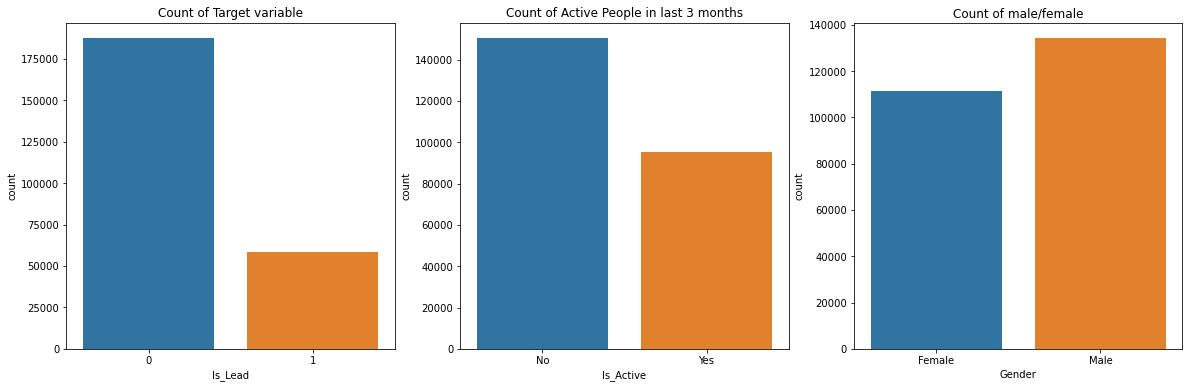

In [32]:
# Plotting the 'Is_Lead', 'Is_Active' and 'Gender' columns separately to check their respective counts.
# Plotting using the subplots.

plt.figure(figsize = [20,6])

plt.subplot(1,3,1)
sns.countplot(df_train['Is_Lead'])
plt.title('Count of Target variable')

plt.subplot(1,3,2)
sns.countplot(df_train['Is_Active'])
plt.title('Count of Active People in last 3 months')

plt.subplot(1,3,3)
sns.countplot(df_train['Gender'])
plt.title('Count of male/female')

plt.show()

**Inference**
1. We can clearly see number of people who did not opt for credit card is almost 3 times more than the number of people who did. There can be class imbalance issue here.
2. Count of non-active people in last 3 months is more than the count of active people in the bank.
3. No. of male members are more than the no. of female members. 


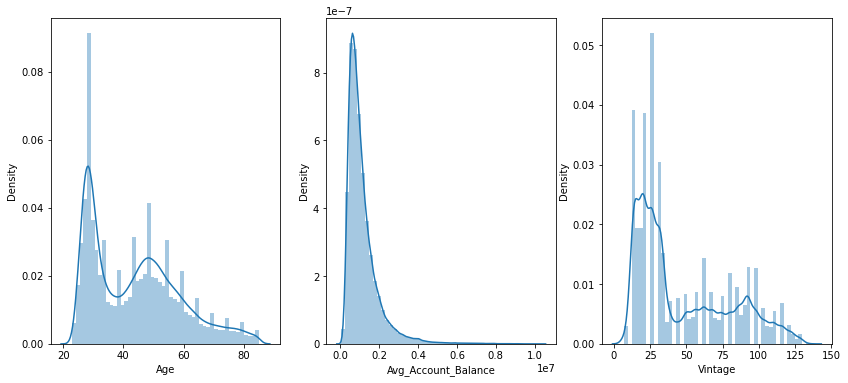

In [33]:
# Distribution Plot for 'Age', 'Avg_Account_Balance' and 'Vintage' column.

plt.figure(figsize = (14,6))

plt.subplot(1,3,1)
sns.distplot(df_train['Age'])

plt.subplot(1,3,2)
sns.distplot(df_train['Avg_Account_Balance'])

plt.subplot(1,3,3)
sns.distplot(df_train['Vintage'])

plt.show()

**Inference/Approach**

1. In `Age` column, observed maximum number of people are in the approx. range 20+years upto 40 years. Minimum value of age is 23, while maximum value of age is 85. 
2. Average account balance(`Avg_Account_Balanc`e column) distribution plot is little right  skewed. The minimum value is 20790 and maximum value is 10352009. 
3. Also, distribution in this column `Avg_Account_Balanc` is not a Normal Distribution. So, in order to correct that, applying a `log transformation` would be a great idea.
4. The `Vintage` column has the maximum values in the range 7 and around 40. The minimum and maximum vintage values are 7 and 135 respectively.

In [34]:
# Performing the Log Tranformation on the Train and Test dataframe
df_train['Avg_Account_Balance_log'] = np.log(df_train['Avg_Account_Balance'])
df_test['Avg_Account_Balance_log'] = np.log(df_test['Avg_Account_Balance'])


# df_train['Age_log'] = np.exp(df_train['Age'])
# df_train['Vintage_log'] = np.log(df_train['Vintage'])

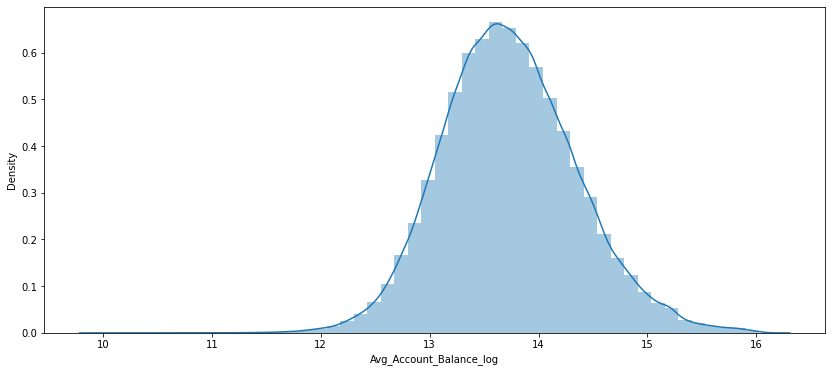

In [35]:
# Plotting the Distribution Plot for Avg_Account_Balance_log column
plt.figure(figsize = (14,6))
sns.distplot(df_train['Avg_Account_Balance_log'])
plt.show()

**The Distribution is turned to a `Normal Distribution`.**

### Outlier Analysis

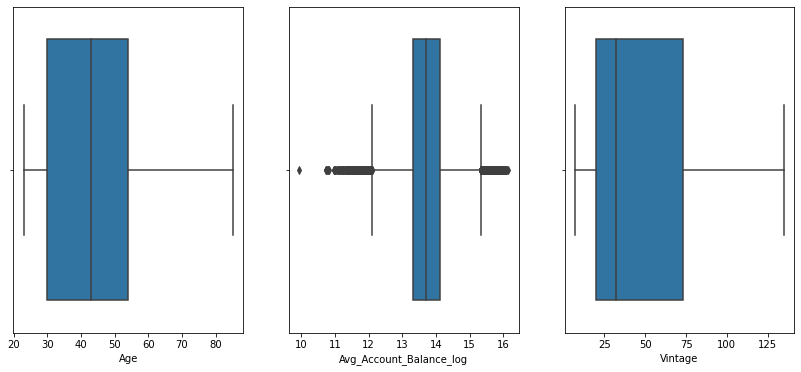

In [36]:
# Plotting the Boxplots for 'Age', 'Avg_Account_Balance' and 'Vintage' columns to check for the outliers.

plt.figure(figsize = (14,6))

plt.subplot(1,3,1)
sns.boxplot(df_train['Age'])

plt.subplot(1,3,2)
sns.boxplot(df_train['Avg_Account_Balance_log'])

plt.subplot(1,3,3)
sns.boxplot(df_train['Vintage'])

plt.show()

**Inference**
- We can’t see any outliers in any variables, however there are some little extreme values in `Avg_Account_Balance_log`(generated from `Avg_Account_Balance`), specially at the left side of the box plot of `Avg_Account_Balance_log` column. Hence, we can do a `lower capping` to **01-percentile** in `Avg_Account_Balance_log` column. as `Avg_Account_Balance_log` has good influence on the **Target variable**.

In [37]:
# Descriptive Analysis of values in numerical column to understand the presence of outliers.

df_train.describe(percentiles = [0.01, 0.10, 0.75, 0.90, 0.95, 0.99])

,Age,Vintage,Avg_Account_Balance,Is_Lead,Avg_Account_Balance_log
count,245725.000000,245725.000000,2.457250e+05,245725.000000,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208,13.733421
std,14.828672,32.353136,8.529364e+05,0.425372,0.619758
min,23.000000,7.000000,2.079000e+04,0.000000,9.942227
1%,25.000000,13.000000,2.336780e+05,0.000000,12.361699
10%,27.000000,14.000000,4.321840e+05,0.000000,12.976607
50%,43.000000,32.000000,8.946010e+05,0.000000,13.704133
75%,54.000000,73.000000,1.366666e+06,0.000000,14.127885
90%,64.000000,98.000000,2.043591e+06,1.000000,14.530219
95%,73.000000,110.000000,2.673533e+06,1.000000,14.798911


In [38]:
df_test.describe(percentiles = [0.01, 0.10, 0.75, 0.90, 0.95, 0.99])

,Age,Vintage,Avg_Account_Balance,Avg_Account_Balance_log
count,105312.000000,105312.000000,1.053120e+05,105312.000000
mean,43.871002,46.842819,1.134195e+06,13.736215
std,14.872890,32.273634,8.662430e+05,0.622153
min,24.000000,7.000000,2.259700e+04,10.025572
1%,25.000000,13.000000,2.336048e+05,12.361386
10%,27.000000,14.000000,4.318639e+05,12.975866
50%,43.000000,32.000000,8.966345e+05,13.706404
75%,54.000000,73.000000,1.371598e+06,14.131487
90%,65.000000,98.000000,2.057077e+06,14.536797
95%,73.000000,109.000000,2.699587e+06,14.808609


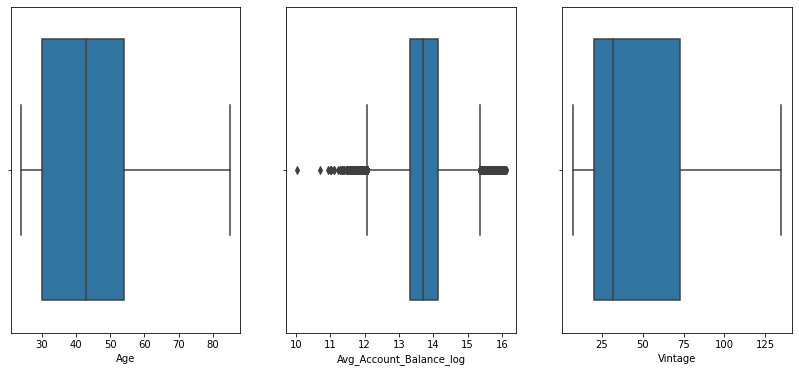

In [39]:
plt.figure(figsize = (14,6))

plt.subplot(1,3,1)
sns.boxplot(df_test['Age'])

plt.subplot(1,3,2)
sns.boxplot(df_test['Avg_Account_Balance_log'])

plt.subplot(1,3,3)
sns.boxplot(df_test['Vintage'])

plt.show()

In [40]:
# Lower capping of the Avg_Account_Balance_log column.
percentiles = df_train['Avg_Account_Balance_log'].quantile([0.01,0.99]).values
df_train['Avg_Account_Balance_log'][df_train['Avg_Account_Balance_log'] <= percentiles[0]] = percentiles[0]
df_test['Avg_Account_Balance_log'][df_test['Avg_Account_Balance_log'] <= percentiles[0]] = percentiles[0]

### Bi-variate & Multivariate

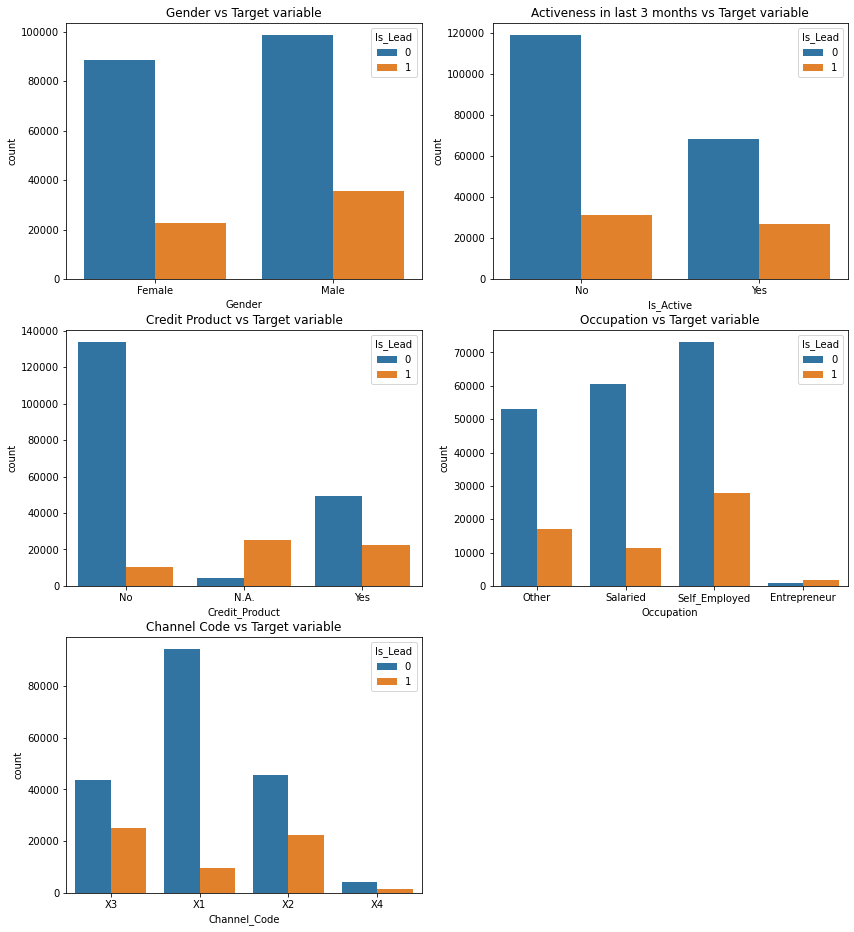

In [41]:
# Plotting the countplot for different categorical columns with Target variable(Is_Lead column).

plt.figure(figsize = [14,16])

plt.subplot(3,2,1)
sns.countplot(df_train['Gender'], hue = df_train['Is_Lead'])
plt.title('Gender vs Target variable')

plt.subplot(3,2,2)
sns.countplot(df_train['Is_Active'], hue = df_train['Is_Lead'])
plt.title('Activeness in last 3 months vs Target variable')

plt.subplot(3,2,3)
sns.countplot(df_train['Credit_Product'], hue = df_train['Is_Lead'])
plt.title('Credit Product vs Target variable')

plt.subplot(3,2,4)
sns.countplot(df_train['Occupation'], hue = df_train['Is_Lead'])
plt.title('Occupation vs Target variable')

plt.subplot(3,2,5)
sns.countplot(df_train['Channel_Code'],  hue = df_train['Is_Lead'])
plt.title('Channel Code vs Target variable')

plt.show()

- Lead value to 'Yes' is more among all 4 categories in self-employed people.
- Entrepreneur has more 'Yes' value than 'No'.
- Credit Product is inversely proportion to the people getting credit cards.

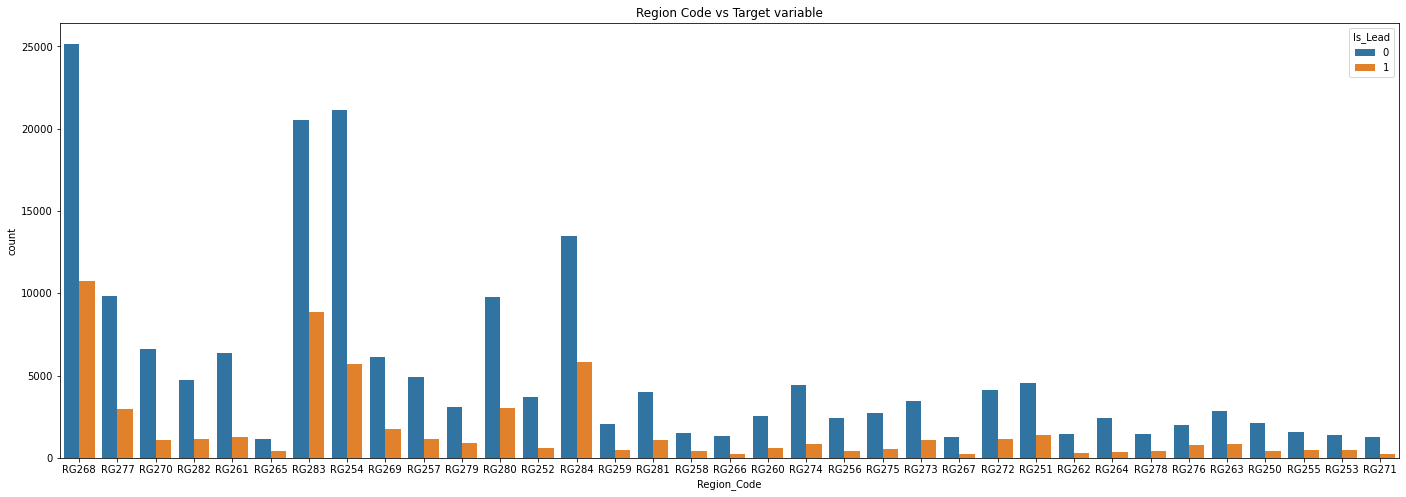

In [42]:
# Plotting countplot of Region_Code column separately with Target variable(Is_lead column).

plt.figure(figsize = (24,8))
sns.countplot(df_train['Region_Code'], hue = df_train['Is_Lead'])
plt.title('Region Code vs Target variable')
plt.show()

**Region wise conversion of the customer is as shown above.**

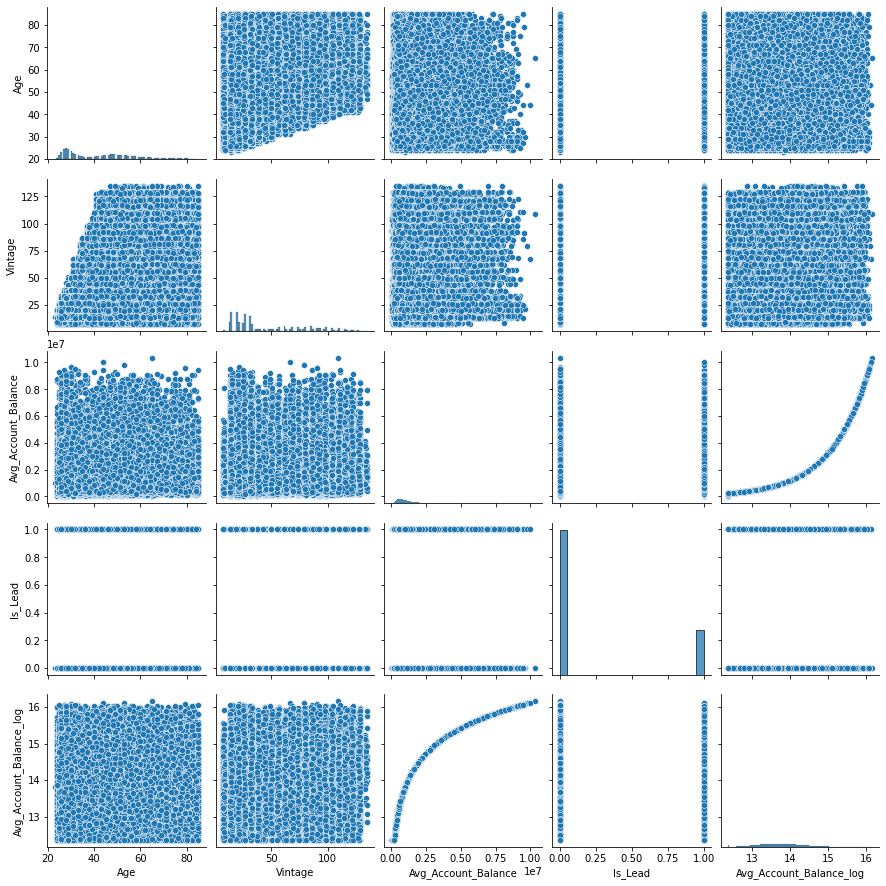

In [43]:
# Plotting the pairplot to check the relation in numerical features.
sns.pairplot(df_train)
plt.show()

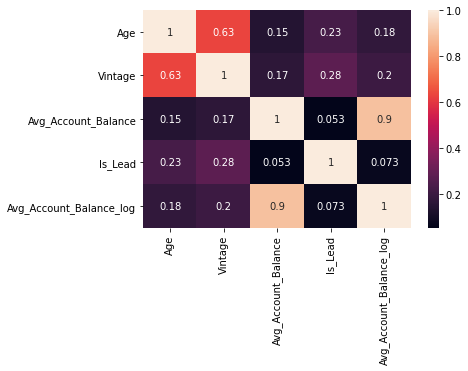

In [44]:
# Plotting the Heatmap, to check the correlation amongst the features.
plt.figure(figsize = (6,4))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

**Inference**
- So, it can be interpreted from the heatmap that `Avg_Account_Balance_log` is influencing the **Target variable** better than the `Avg_Account_Balance`.
- Also, `Avg_Account_Balance_log` and `Avg_Account_Balance` are highly correlated. So, dropping `Avg_Account_Balance` would a great approach.

In [45]:
# Dropping Avg_Account_Balance column from the dataframe
df_train.drop('Avg_Account_Balance',1,inplace=True)
df_test.drop('Avg_Account_Balance',1,inplace=True)

### Class Imbalace Analysis

In [46]:
# Checking for the ratio for both the classes
df_1 = df_train[df_train['Is_Lead']==1]
df_0 = df_train[df_train['Is_Lead']==0]

print('No. of datapoints with Is_Lead val as 1, are :',df_1.shape[0])
print('No. of datapoints with Is_Lead val as 0, are :',df_0.shape[0])
print('Class Imbalance Ratio :',len(df_0)/len(df_1))

No. of datapoints with Is_Lead val as 1, are : 58288
No. of datapoints with Is_Lead val as 0, are : 187437
Class Imbalance Ratio : 3.215704776283283


**Inference/Approach**
- So, we can see the customers not taking credit cards are 3 times more than the ones taking.
- But in real world scenario, the data actually holds true values, as the no. of people Not taking the credit cards will always be much more than people actually taking it. So, performing any sampling techniques might lead to in inaccurate results. For e.g. if we go ahead with undersampling, there might be the issue of data constrictions(data loss), whereas if go ahead with oversampling technique, then no. of 'Yes' will be given equal weightage as no. of 'No'. So, this should never be the case. 

In [47]:
#Now changing all categorical column into numerical form using label endcoding
cat_col=[ 'Gender', 'Region_Code', 'Occupation','Channel_Code', 'Credit_Product', 'Is_Active']

# Importing Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_col:
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.transform(df_test[col])

df_train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Is_Active,Is_Lead,Avg_Account_Balance_log
0,0,73,18,1,2,43,1,0,0,13.860193
1,0,30,27,2,0,32,1,0,0,13.274205
2,0,56,18,3,2,26,1,1,0,14.210464
3,1,34,20,2,0,19,1,0,0,13.061453
4,0,30,32,2,0,33,1,0,0,13.695360


In [48]:
# X = df_train.drop('Is_Lead',1)
#seperating independent and dependent variables
X = df_train.drop('Is_Lead',1)
y = df_train['Is_Lead']
X.shape, y.shape

((245725, 9), (245725,))

### Train and Test split

In [49]:
# Importing the train test split function and Then splitting the Train data in two different subsets of Train & Test.
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,y, random_state = 56)

In [50]:
train_x.shape, test_x.shape

((184293, 9), (61432, 9))

In [51]:
train_y.shape, test_y.shape

((184293,), (61432,))

### Feature Scaling

In [52]:
# Normalising the dataframe using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [53]:
# fit_transform() on Train data and transform() on Test data
train_x_scaled = pd.DataFrame(scaler.fit_transform(train_x), columns=train_x.columns, index = train_x.index)
test_x_scaled = pd.DataFrame(scaler.transform(test_x), columns=test_x.columns, index = test_x.index)
df_test_scaled = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns, index = df_test.index)

In [54]:
df_test_scaled.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Is_Active,Avg_Account_Balance_log
0,0.912506,-1.001821,-1.458762,-1.292628,-1.021217,-0.678071,1.333593,-0.79629,-0.354223
1,0.912506,-0.057638,-0.170839,-1.292628,0.109411,0.063751,-1.898822,-0.79629,0.005387
2,0.912506,-0.866938,0.013150,-0.121225,-1.021217,-1.018073,-0.282615,-0.79629,-2.239083
3,0.912506,-1.001821,0.197139,-1.292628,-1.021217,-0.430797,-0.282615,-0.79629,-0.099141
4,-1.095883,-1.001821,0.013150,-1.292628,-1.021217,-0.863527,-0.282615,-0.79629,-0.553204


In [55]:
train_x_scaled.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Is_Active,Avg_Account_Balance_log
16212,0.912506,0.212128,-0.170839,1.050177,0.109411,0.836483,-0.282615,1.255823,0.654528
77993,0.912506,0.481895,1.209078,-2.464031,1.240038,0.311025,1.333593,-0.796290,0.896841
30332,0.912506,0.819103,-1.458762,1.050177,0.109411,-0.678071,-1.898822,1.255823,-0.128885
170609,-1.095883,-0.597172,-1.734746,-0.121225,0.109411,-0.832617,-0.282615,-0.796290,0.042838
15594,0.912506,0.347012,0.197139,1.050177,0.109411,0.311025,-0.282615,-0.796290,-0.122851


In [56]:
test_x_scaled.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Is_Active,Avg_Account_Balance_log
44905,-1.095883,-1.204146,1.209078,-0.121225,-1.021217,-0.987164,-0.282615,-0.796290,1.449626
4613,0.912506,-1.136705,0.381128,-0.121225,-1.021217,-0.863527,1.333593,-0.796290,0.342056
170256,0.912506,-1.069263,-0.814801,-0.121225,-1.021217,-0.647162,-0.282615,-0.796290,-0.204452
239643,0.912506,-1.204146,-1.458762,-1.292628,-1.021217,-1.018073,-0.282615,-0.796290,2.289921
103430,-1.095883,0.279570,1.209078,-1.292628,0.109411,-0.461706,-0.282615,1.255823,-0.370687


## Model Building

**Since this is a classification problem - so, going ahead with `Logistic Regression`, `Decision Tree Classifier`, `Random Forest Classifier` and `XGBoost Classifier`.** 

### 1. Logistic Regression Model

In [57]:
#importing Logistic Regression and metric roc_auc_score
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_auc_score

In [58]:
logreg=LogisticRegression(class_weight = 'balanced', random_state=42)
logreg.fit(train_x_scaled,train_y)
y_pred=logreg.predict_proba(test_x_scaled)[:,1]

In [59]:
# Train roc_auc score
roc_auc_score(test_y,y_pred)

0.734774713853812

In [60]:
# Test roc_auc score
roc_auc_score(train_y,logreg.predict_proba(train_x_scaled)[:,1])

0.7314706765422347

In [62]:
# Importing the recall_score and checking Train recall score
from sklearn.metrics import recall_score

recall_score(train_y,logreg.predict(train_x_scaled))

0.6729973717289452

In [63]:
# Test recall score
recall_score(test_y,logreg.predict(test_x_scaled))

0.6796944884056974

In [64]:
from sklearn import metrics

print('Accurace on Train data ', metrics.accuracy_score(train_y, logreg.predict(train_x_scaled)))
print('Accurace on Test data ', metrics.accuracy_score(test_y, logreg.predict(test_x_scaled)))

Accurace on Train data  0.6690324646079884
Accurace on Test data  0.6699765594478447


In [65]:
# final_pred_1 = logreg.predict_proba(df_test_scaled)[:,1]
# final_pred_1

In [66]:
# final_pred_df_1 = pd.DataFrame(final_pred_1)
# sub = pd.read_csv(r"C:\Users\divyansh.purswani\Downloads\random_submission.csv")
# df_merged = pd.concat([sub, final_pred_df_1], axis=1)
# df_merged.rename(columns = {0 : 'Is_lead'}, inplace = True)
# df_merged.drop('Is_Lead',1,inplace = True)
# df_merged.rename(columns = {'Is_lead' : 'Is_Lead'}, inplace = True)
# df_merged.to_csv('sub_lr_simple2.csv',index=False)

### 2. Decision Tree Classifier

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
dt = DecisionTreeClassifier(class_weight = 'balanced', random_state =100)
dt.fit(train_x_scaled,train_y)
y_pred=dt.predict_proba(test_x_scaled)[:,1]

In [69]:
# Train roc_auc score
roc_auc_score(test_y,y_pred)

0.7046338909951395

In [70]:
# Test roc_auc score
roc_auc_score(train_y,dt.predict_proba(train_x_scaled)[:,1])

0.9999999991868914

In [71]:
from sklearn import metrics

print('Accurace on Train data ', metrics.accuracy_score(train_y, dt.predict(train_x_scaled)))
print('Accurace on Test data ', metrics.accuracy_score(test_y, dt.predict(test_x_scaled)))

Accurace on Train data  0.999978295431731
Accurace on Test data  0.7871793202239875


In [72]:
# Train recall score
recall_score(train_y,dt.predict(train_x_scaled))

1.0

In [73]:
# Test recall score
recall_score(test_y,dt.predict(test_x_scaled))

0.5479254111332829

**Clearly, this is the case of overfitting. So, going ahead with `RandomForestClassifier()`.**

### 3.1 Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state = 100, class_weight = 'balanced')
forest = forest.fit(train_x_scaled,train_y)
y_pred=forest.predict_proba(test_x_scaled)[:,1]

In [75]:
# Test roc_auc score
roc_auc_score(test_y,y_pred)

0.8541020218593515

In [76]:
# Train roc_auc score
roc_auc_score(train_y,forest.predict_proba(train_x_scaled)[:,1])

0.9999997304545035

In [77]:
from sklearn import metrics

print('Accurace on Train data ', metrics.accuracy_score(train_y, forest.predict(train_x_scaled)))
print('Accurace on Test data ', metrics.accuracy_score(test_y, forest.predict(test_x_scaled)))

Accurace on Train data  0.9998751987324532
Accurace on Test data  0.8533826019012892


In [78]:
# Train recall score
recall_score(train_y,forest.predict(train_x_scaled))

0.9995429093817849

In [79]:
# Test recall score
recall_score(test_y,forest.predict(test_x_scaled))

0.5643019335305856

**So, we have improved some overfitting issue, but still this is the case of overfitting. So, going ahead with `RandomForestClassifier()` with `hyperparameter tuning` using `GridSearchCV`.**

### 3.2 Random Forest Classifier Using GridSearchCV

In [80]:
rf = RandomForestClassifier(random_state = 100, class_weight = 'balanced', n_jobs=-1)

params = {
    'max_depth' : [1,2,5,10,20],
    'min_samples_leaf' : [5,10,20,50,100],
    'n_estimators' : [1,10,30,50,100,200]
}

In [81]:
from sklearn.model_selection import GridSearchCV

gridsearchcv = GridSearchCV(estimator=rf, param_grid=params, scoring='roc_auc')

gridsearchcv.fit(train_x_scaled,train_y)

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=100),
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [1, 10, 30, 50, 100, 200]},
             scoring='roc_auc')

In [82]:
gridsearchcv.best_estimator_.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, n_estimators=200, n_jobs=-1,
                       random_state=100)>

In [86]:
rf2 = RandomForestClassifier(class_weight = 'balanced', max_depth= 10, min_samples_leaf =5, n_estimators=200)
rf2.fit(train_x_scaled,train_y)
y_pred=rf2.predict_proba(test_x_scaled)[:,1]

In [87]:
# Test roc_auc score
roc_auc_score(test_y,y_pred)

0.8717151791103432

In [88]:
# Train roc_auc score
roc_auc_score(train_y,rf2.predict_proba(train_x_scaled)[:,1])

0.8827674008128149

In [89]:
print('Accurace on Train data ', metrics.accuracy_score(train_y, rf2.predict(train_x_scaled)))
print('Accurace on Test data ', metrics.accuracy_score(test_y, rf2.predict(test_x_scaled)))

Accurace on Train data  0.8272750457152469
Accurace on Test data  0.8246353691886964


In [90]:
# Train recall score
recall_score(train_y,rf2.predict(train_x_scaled))

0.7731230716489544

In [91]:
# Test recall score
recall_score(test_y,rf2.predict(test_x_scaled))

0.7607513933805822

In [92]:
final_pred_2 = rf2.predict_proba(df_test_scaled)[:,1]
final_pred_2

array([0.09674988, 0.95029186, 0.15787651, ..., 0.25398257, 0.45428087,
       0.14952589])

In [93]:
final_pred_df_2 = pd.DataFrame(final_pred_2)
sub = pd.read_csv(r"C:\Users\divyansh.purswani\Downloads\random_submission.csv")
df_merged = pd.concat([sub, final_pred_df_2], axis=1)
df_merged.head()

,ID,Is_Lead,0
0,VBENBARO,1,0.096750
1,CCMEWNKY,1,0.950292
2,VK3KGA9M,1,0.157877
3,TT8RPZVC,1,0.075857
4,SHQZEYTZ,1,0.070375


In [94]:
df_merged.rename(columns = {0 : 'Is_lead'}, inplace = True)
df_merged.drop('Is_Lead',1,inplace = True)
df_merged.rename(columns = {'Is_lead' : 'Is_Lead'}, inplace = True)
df_merged.to_csv('sub_rf_gridcv_final2.csv',index=False)
df_merged.head()

,ID,Is_Lead
0,VBENBARO,0.096750
1,CCMEWNKY,0.950292
2,VK3KGA9M,0.157877
3,TT8RPZVC,0.075857
4,SHQZEYTZ,0.070375


### 4.1 Extreme Gradient Boosting (XGBoost Classifier)

In [75]:
# Importing XGBoost model
import xgboost as xgb

In [76]:
# pip install xgboost

In [77]:
# Fitting the model and predicting the probabilities. 
xgboost = xgb.XGBClassifier(class_weight = 'balanced', random_state = 100)

xgboost.fit(train_x_scaled,train_y)
y_pred=xgboost.predict_proba(test_x_scaled)[:,1]

[21:31:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:31:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [78]:
# roc_auc score on the splitted Test data
roc_auc_score(test_y,y_pred)

0.8711501365467261

In [79]:
# roc_auc score on the splitted Train data
roc_auc_score(train_y,xgboost.predict_proba(train_x_scaled)[:,1])

0.8939319058376218

In [80]:
# Printing the accuracy
print('Accurace on Train data ', metrics.accuracy_score(train_y, xgboost.predict(train_x_scaled)))
print('Accurace on Test data ', metrics.accuracy_score(test_y, xgboost.predict(test_x_scaled)))

Accurace on Train data  0.8689206860814029
Accurace on Test data  0.8608379997395494


In [121]:
# Train recall score
recall_score(train_y,xgboost.predict(train_x_scaled))

0.5785624500057136

In [122]:
# Test recall score
recall_score(test_y,xgboost.predict(test_x_scaled))

0.560448634142985

### 4.2 Extreme Gradient Boosting (XGBoost Classifier) with GridSearchCV

In [99]:
params = {
    'learning_rate' : [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    'max_depth' : [5, 8, 10, 15, 20, 30, 40],
    'min_child_weight' : [11, 15, 17, 19]
}

In [100]:
xgboost1 = xgb.XGBClassifier(random_state=100, class_weight ='balanced')

from sklearn.model_selection import GridSearchCV

gridsearchcv = GridSearchCV(estimator=xgboost1, param_grid=params, scoring='roc_auc' , cv=3, n_jobs=-1)
gridsearchcv.fit(train_x_scaled,train_y)

[18:36:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:36:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     class_weight='balanced',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, mo...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=100, reg_alpha=None,
                              

In [101]:
# Getting the best parameters
gridsearchcv.best_estimator_.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=11, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)>

In [123]:
# Fitting the model and predicting the probabilities. 
xgboost1 = xgb.XGBClassifier(class_weight = 'balanced', random_state = 100, learning_rate=0.1, max_depth=5, min_child_weight=15, n_estimators=100)

xgboost1.fit(train_x_scaled,train_y)
y_pred=xgboost1.predict_proba(test_x_scaled)[:,1]

[22:23:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:23:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [124]:
# roc_auc score on the splitted Test data
roc_auc_score(test_y,y_pred)

0.8732612692296728

In [125]:
# roc_auc score on the splitted Train data
roc_auc_score(train_y,xgboost1.predict_proba(train_x_scaled)[:,1])

0.8784955011653235

In [126]:
# Printing the accuracy
print('Accurace on Train data ', metrics.accuracy_score(train_y, xgboost1.predict(train_x_scaled)))
print('Accurace on Test data ', metrics.accuracy_score(test_y, xgboost1.predict(test_x_scaled)))

Accurace on Train data  0.8616876387057566
Accurace on Test data  0.8617007422841516


In [127]:
# Train recall score
recall_score(train_y,xgboost1.predict(train_x_scaled))

0.5427036910067421

In [128]:
# Test recall score
recall_score(test_y,xgboost1.predict(test_x_scaled))

0.5423518888047891

In [132]:
# final_pred_2 = xgboost1.predict_proba(df_test_scaled)[:,1]
# final_pred_2

array([0.04230718, 0.864289  , 0.06931195, ..., 0.05918911, 0.21424003,
       0.04472956], dtype=float32)

In [133]:
# final_pred_df_2 = pd.DataFrame(final_pred_2)
# sub = pd.read_csv(r"C:\Users\divyansh.purswani\Downloads\random_submission.csv")
# df_merged = pd.concat([sub, final_pred_df_2], axis=1)
# df_merged.head()

,ID,Is_Lead,0
0,VBENBARO,1,0.042307
1,CCMEWNKY,1,0.864289
2,VK3KGA9M,1,0.069312
3,TT8RPZVC,1,0.025850
4,SHQZEYTZ,1,0.026632


In [94]:
# df_merged.rename(columns = {0 : 'Is_lead'}, inplace = True)
# df_merged.drop('Is_Lead',1,inplace = True)
# df_merged.rename(columns = {'Is_lead' : 'Is_Lead'}, inplace = True)
# df_merged.to_csv('sub_xgb_gridcv2_final.csv',index=False)
# df_merged.head()

,ID,Is_Lead
0,VBENBARO,0.042307
1,CCMEWNKY,0.864289
2,VK3KGA9M,0.069312
3,TT8RPZVC,0.025850
4,SHQZEYTZ,0.026632


## Observation/Conclusion

1) **Logistic Regression Metrics** :                                                                          
**Train Data**:                                                                
* Accuracy : 66.90%                                                              
* ROC AUC Score% : 73.14%  
* Recall : 67.29%                                                                             
                                                                                            
**Test Data**:                                                              
* Accuracy : 66.99%                                                                     
* ROC AUC Score% : 73.47%                                                                    
* Recall : 67.96%

2) **Decision Tree Metrics** :                                                                             
**Train Data**:                                                                
* Accuracy : 99.99%                                                              
* ROC AUC Score% : 99.99%  
* Recall : 100%                                                                             
                                                                                            
**Test Data**:                                                              
* Accuracy : 78.71%                                                                     
* ROC AUC Score% : 70.46%                                                                    
* Recall : 54.79% 

3) **Random Forest Metrics** :                                                                             
**Train Data**:                                                                
* Accuracy : 99.98%                                                              
* ROC AUC Score% : 99.99%  
* Recall : 99.95%                                                                             
                                                                                            
**Test Data**:                                                              
* Accuracy : 85.33%                                                                     
* ROC AUC Score% : 85.41%                                                                    
* Recall : 56.43%  

4) **Random Forest Metrics with Grid Search CV** :                                                                             
**Train Data**:                                                                
* Accuracy : 82.72%                                                              
* ROC AUC Score% : 88.27%  
* Recall : 77.31%                                                                             
                                                                                            
**Test Data**:                                                              
* Accuracy : 82.46%                                                                     
* ROC AUC Score% : 87.17%                                                                
* Recall : 76.07%  

5) **XGBoost Metrics** :                                                                          
**Train Data**:                                                                
* Accuracy : 86.89%                                                              
* ROC AUC Score% : 89.39%  
* Recall : 57.85%                                                                             
                                                                                            
**Test Data**:                                                              
* Accuracy : 86.08%                                                                     
* ROC AUC Score% : 87.11%                                                                    
* Recall : 56.04%  

6) **XGBoost Metrics with Grid Search CV** :                                                                          
**Train Data**:                                                                
* Accuracy : 86.16%                                                              
* ROC AUC Score% : 87.84%  
* Recall : 54.27%                                                                             
                                                                                            
**Test Data**:                                                              
* Accuracy : 86.17%                                                                     
* ROC AUC Score% : 87.32%                                                                    
* Recall : 54.23%  

**Submitting the final model `Random Forest Classifier` which is `hyperparameter` tuned, even though the `roc_score` in `XGBoost Classifier` is more but in `Random Forest Classifier` the `recall score` is good along with `roc_auc score`.
Hence, going ahead with `Random Forest Classifier`**